In [1]:
import pandas as pd

import nltk
import string
import re
import numpy as np
import pandas as pd
import pickle
#import lda

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words

from collections import Counter
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook
#from bokeh.transform import factor_cmap

import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger("lda").setLevel(logging.WARNING)

In [2]:
df4=pd.read_csv('questionbigram1_v2.csv')
df4=df4.fillna('buriub')

list1=[]
for i in range(0,len(df4)):
    for j in range(0,len(df4.iloc[i])):
        a=df4.iloc[i][j]
        list1.append(a)
        
        
list1=list(set(list1))
list1.append('?')

In [5]:
df=pd.read_csv('tech_Score_added.csv', encoding='Latin-1')
del df['Unnamed: 0']
df=df[df['work_ques']==1]

In [6]:
df.shape

(24904, 23)

In [7]:
list(df)

['timestamp',
 'user_id',
 'message',
 'dest',
 'MsgId',
 'ques',
 'message2',
 'word_count',
 'users',
 'users2',
 'time_reply',
 'replybydest',
 'replybysender',
 'ques_asking_keywords',
 'clean_msg_Dest',
 'clean_msg_starter',
 'keywords_starterReply',
 'keywords_DESTReply',
 'concat_keywords',
 'tokens',
 'tech_score',
 'tech_wordIn',
 'work_ques']

In [8]:
def gratitude_shown(x):
    
    try:
        y=x.split('_')
        list2=['thanks' ,'thx' ,' thanx', 'thank you', 'thnx','thanks' ,'thx' , 'brilliant','thanks a lot', 
           'thank you very much', 'great' , 'awesome','cool']
        for i in y:
            if i in list2:
                return 1
            else:
                return 0
            
    except:
            return 0
    

In [9]:
gratitude_shown(df.iloc[1][16])

0

In [10]:
df['grat_shown'] = df['keywords_starterReply'].map(gratitude_shown)

In [11]:
df1=df[df['grat_shown']==1].reset_index(drop=True)

In [12]:
df1.shape

(3205, 24)

In [13]:
df1

,timestamp,user_id,message,dest,MsgId,ques,message2,word_count,users,users2,...,clean_msg_Dest,clean_msg_starter,keywords_starterReply,keywords_DESTReply,concat_keywords,tokens,tech_score,tech_wordIn,work_ques,grat_shown
0,1.482139e+09,U0ZEL9V0F,"Morning Laszlo - yes that would be great, do y...",U0TDT85B6,143,1,"['Morning', 'Laszlo', 'that', 'would', 'great'...",10,U0ZEL9V0F_U0TDT85B6,U0TDT85B6_U0ZEL9V0F,...,"['Yes', 'will', 'send', 'message', 'will', 'ar...","['great', 'I', 'm', 'free', 'afternoon', 'tomo...",great,yes,"['would do you', 'yes', 'great']","['morning', 'laszlo', 'yes', 'would', 'great',...",0.4,0,1,1
1,1.482149e+09,U02EENFGK,so is it something i can use for simplicity or...,U0LNDAUQ6,469,1,"['is', 'it', 'i', 'can', 'simplicity', 'is', '...",12,U02EENFGK_U0LNDAUQ6,U0LNDAUQ6_U02EENFGK,...,"['SELECT', 'FROM', 'Users', 'AS', 'WHERE', 'u....","['cool', 'docs', 'are', 'bit', 'wonky', 'under...",cool,yep_great_yeah,"['it i can it', 'yep_great_yeah', 'cool']","['something', 'use', 'simplicity', 'reason', '...",1.6,0,1,1
2,1.482154e+09,U0BS2CN6L,"ok, then rather tomorrow morning, if that's no...",U14K5KWC8,595,1,"['tomorrow', 'morning', 'if', 'that', ""'s"", 'l...",6,U0BS2CN6L_U14K5KWC8,U14K5KWC8_U0BS2CN6L,...,"['it', 's', 'alright', 'we', 'have', 'to', 'de...","['let', 's', 'do', 'tomorrow', 'morning', 'sta...",great,NaN,"['', 'NA', 'great']","['ok', 'rather', 'tomorrow', 'morning', 'late']",0.4,0,1,1
3,1.482233e+09,U2B2C7UKA,Hi George. What's the time between bkgopt call...,U269AC7GE,1160,1,"['Hi', 'George', 'What', ""'s"", 'time', 'bkgopt...",9,U2B2C7UKA_U269AC7GE,U269AC7GE_U2B2C7UKA,...,"['Hi', 'it', 'is', '30', 'to', '45', 'secs', '...","['Successful', 'calls', 'For', 'tomorrow', 's'...",great,NaN,"['what', 'NA', 'great']","['hi', 'george', 'what', 'time', 'bkgopt', 'ca...",0.5,0,1,1
4,1.482239e+09,U2UH7RA22,Is it fair to say that the actual tech is a sm...,U02EEHT1J,1371,1,"['Is', 'it', 'fair', 'to', 'that', 'actual', '...",10,U2UH7RA22_U02EEHT1J,U02EEHT1J_U2UH7RA22,...,"['what', 'do', 'you', 'tech', 'The', 'majority...","['And', 'academics', 'who', 'are', 'modelling'...",cool,yes,"['it', 'yes', 'cool']","['is', 'fair', 'say', 'actual', 'tech', 'small...",1.0,1,1,1
5,1.482239e+09,U2UH7RA22,And its mainly the academics who are modelling...,U02EEHT1J,1372,1,"['And', 'academics', 'who', 'are', 'modelling'...",10,U2UH7RA22_U02EEHT1J,U02EEHT1J_U2UH7RA22,...,"['what', 'do', 'you', 'tech', 'The', 'majority...","['So', 'optimisation', 'engine', 'Its', 'what'...",cool,yes,"['can', 'yes', 'cool']","['and', 'mainly', 'academics', 'modelling', 'p...",1.5,2,1,1
6,1.482240e+09,U2UH7RA22,So the engine itself is useless without correc...,U02EEHT1J,1384,1,"['So', 'engine', 'is', 'useless', 'correct', '...",6,U2UH7RA22_U02EEHT1J,U02EEHT1J_U2UH7RA22,...,"['PwC', 'otpimisation', 'team', 'has', 'one', ...","['And', 'how', 'is', 'engine', 'unique', 'to',...",cool,yes,"['', 'yes', 'cool']","['so', 'engine', 'useless', 'without', 'correc...",1.1,2,1,1
7,1.482240e+09,U2UH7RA22,And how is the engine unique to you guys? As i...,U02EEHT1J,1386,1,"['And', 'how', 'is', 'engine', 'unique', 'to',...",12,U2UH7RA22_U02EEHT1J,U02EEHT1J_U2UH7RA22,...,"['We', 'built', 'Solve', 'Engine', 'thing', 'k...","['Can', 'I', 'quote', 'that/', 'How', 'do', 'y...",cool,yes,"['how you you it', 'yes', 'cool']","['and', 'engine', 'unique', 'guys', 'as', 'bui...",0.6,1,1,1
8,1.482245e+09,U2B2C7UKA,OK - well done. Does it go to Darius today for...,U0BS2CN6L,1486,1,"['OK', 'well', 'Does', 'it', 'to', 'Darius', '...",10,U2B2C7UKA_U0BS2CN6L,U0BS2CN6L_U2B2C7UKA,...,[''],"['Understood', 'Thanks', 'substantial', 'effor...",thanks,NaN,"['does it', 'NA', 'thanks']","['ok', 'well', 'done', 'does', 'go', 'darius',...",0.5,2,1,1
9,1.482254e+09,U0ZEL9V0F,the only comment I have is whether we are givi...,U14K5KWC8,1662,1,"['comment', 'I', 'have', 'is', 'we', 'are', 'i...",8,U0ZEL9V0F_U14K5KWC8,U14K5KWC8_U0ZEL9V0F,...,"['i', 'do', 'nt', 's', 'much', 'IP', 'we', 'to...","['you', '

In [15]:
df_id_name=pd.read_csv('users.csv')
#df1[['user_id','username']]

In [16]:
user_list=[]
for i in range(0,len(df_id_name)):
    a=df_id_name.iloc[i][0]
    user_list.append(a)

In [17]:
user_list = [x for x in user_list if str(x) != 'nan']

In [18]:
def find_username(id):
    for i in range(0,len(df_id_name)):
        a=df_id_name.iloc[i][0]
        if a == id:
            b=df_id_name.iloc[i][1]
            return b

In [19]:
adj_table=df[['user_id','dest']]
adj_table=adj_table.drop_duplicates()
adj_table=adj_table.reset_index(drop=True)

 ### No of work related questions which had a solution

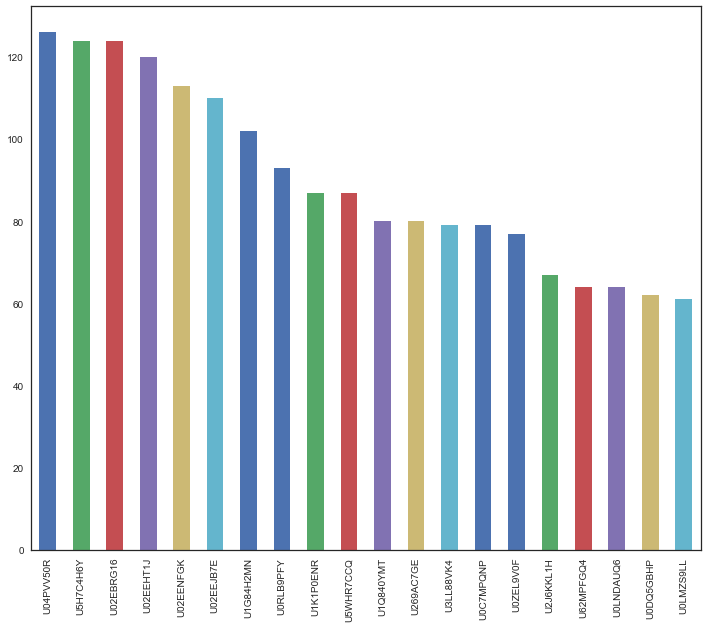

In [20]:
df1['dest'].value_counts().head(20).plot.bar(figsize=(12,10))

#### No of  persons who asked questions from each person and had a solution

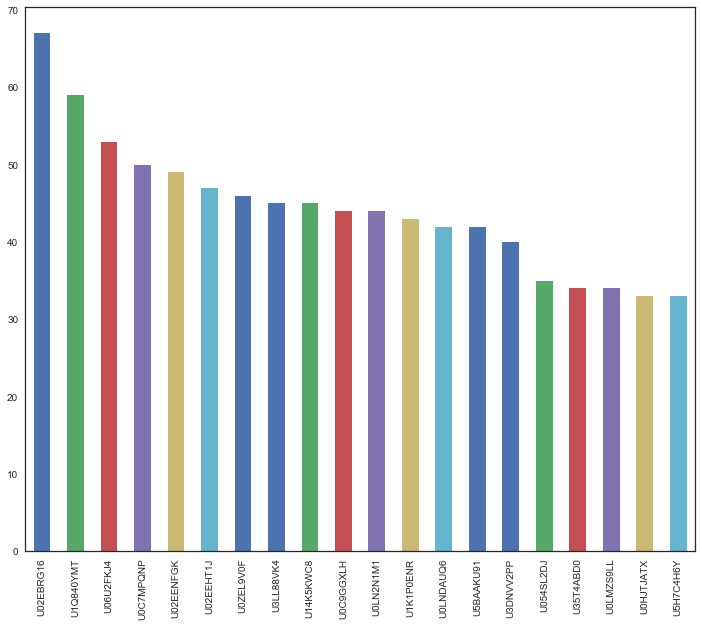

In [21]:
adj_table['dest'].value_counts().head(20).plot.bar(figsize=(12,10))

In [14]:
df1.to_csv('grat_shown_ques.csv')